Dijkstra's Algorithm - A Real Application Example
---

In [1]:
from datetime import datetime
current_date_time = datetime.now()
formatted_date_time = current_date_time.strftime("%Y-%m-%d %H:%M:%S")
author = 'Federico Targa'
print('------------------------------------')
print("| Date & Hour:", formatted_date_time,'|')
print('------------------------------------')
print('------------------------------------')
print('     |Author: ', author                 ,'|')
print('------------------------------------')

------------------------------------
| Date & Hour: 2023-08-11 18:55:15 |
------------------------------------
------------------------------------
     |Author:  Federico Targa |
------------------------------------


INTRODUCTION
--
Dijkstra's algorithm is a popular graph search algorithm used to find the shortest path from a single source vertex to all other vertices in a weighted graph. It's particularly efficient for graphs with non-negative edge weights. The algorithm maintains a set of vertices whose shortest distance from the source vertex is already known, gradually expanding this set until it covers all vertices in the graph.

HOW DOES IT WORKS?
---

Input:

1) A weighted graph with vertices (nodes) and edges (connections between vertices).
2) Each edge has a non-negative weight, representing the cost of traversing that edge.
3) A designated source vertex from which to find the shortest paths to all other vertices.

Initialization:

1. Create three main data structures:
- Distances: A dictionary to store the shortest distance from the source to each vertex. Initialize the distance of  the source vertex to 0 and all other vertices to infinity.
- Visited: A set to keep track of visited vertices.
- Priority Queue (Min Heap): Initially containing the source vertex with a distance of 0.

- Algorithm Steps:
2. While the priority queue is not empty:

1) Remove the vertex with the smallest distance from the priority queue. This is the current vertex.
2) the current vertex is already visited, skip to the next iteration.
3) Mark the current vertex as visited.
4) For each neighbor of the current vertex that hasn't been visited:
 - Calculate the tentative distance from the source to the neighbor through the current vertex. This is the sum of the distance to the current vertex and the weight of the edge between the current vertex and the neighbor.
 - If the tentative distance is smaller than the currently known distance to the neighbor, update the distance in the distances dictionary.
- Add the neighbor to the priority queue with the updated distance.

- Termination:
3. Once the priority queue becomes empty, the algorithm has found the shortest paths from the source vertex to all other vertices in the graph.

Output:

1) The distances dictionary will contain the shortest distances from the source vertex to all other vertices.
2) You can backtrack from this distances dictionary to reconstruct the shortest paths themselves.

TIME COMPLEXITY
---

The time complexity of Dijkstra's algorithm depends on the data structures used to implement the priority queue. Using a binary heap, the algorithm takes O((V + E) * log V) time, where V is the number of vertices and E is the number of edges in the graph.

It's worth noting that Dijkstra's algorithm doesn't work correctly when the graph has negative edge weights. For such cases, you might want to consider using Bellman-Ford algorithm, which can handle negative weights but has a higher time complexity.

 In the context of Dijkstra's algorithm, the time complexity represents how the number of vertices and edges in the graph affects the time it takes for the algorithm to compute the shortest paths.

Let's break down the time complexity of Dijkstra's algorithm step by step:

- Initialization:
  - Initializing the distances dictionary for V vertices takes O(V) time.
  - Initializing the priority queue (min heap) with the source vertex takes O(log V) time.

 - Main Loop:
  - The main loop of the algorithm runs V times, where V is the number of vertices in the graph. In each iteration:

- Removing the vertex with the smallest distance from the priority queue (min heap) takes O(log V) time.
- Checking if the vertex is visited takes O(1) time (using the visited set).
- Marking the vertex as visited takes O(1) time.
- For each edge (E) in the graph, the following operations take place:
  - Calculating the tentative distance and updating the distances dictionary takes O(1) time.
  - Updating the priority queue takes O(log V) time.

Since each vertex can be removed from the priority queue at most once and each edge is examined once, the total time spent in this part of the algorithm is proportional to (V + E) * log V.

- Termination:
Once all vertices have been visited, the main loop terminates. This takes O(V) time.

Adding up all these parts:

- Initialization: O(V)
- Main Loop: O((V + E) * log V)
- Termination: O(V)

The dominant factor in the time complexity is usually the main loop's O((V + E) * log V) term, especially for sparse graphs (where E is much smaller than V^2). In cases where the graph is dense (E is closer to V^2), the initialization and termination terms can become more significant.

Overall, the time complexity of Dijkstra's algorithm is typically approximated as O((V + E) * log V), considering that the log V factor is often smaller than the actual number of edges and vertices.

It's worth noting that if you're using a Fibonacci heap as the priority queue data structure (which has lower amortized complexity for some operations), the time complexity can be improved to O(E + V * log V). However, Fibonacci heaps are more complex to implement and often have higher constant factors, making them less efficient in practice for small to moderately sized graphs.

Now let's try to solve a real problem:
---
To run this file, please be sure to add "dijkstraData.txt" file in the same source code folder.

PROBLEM
--

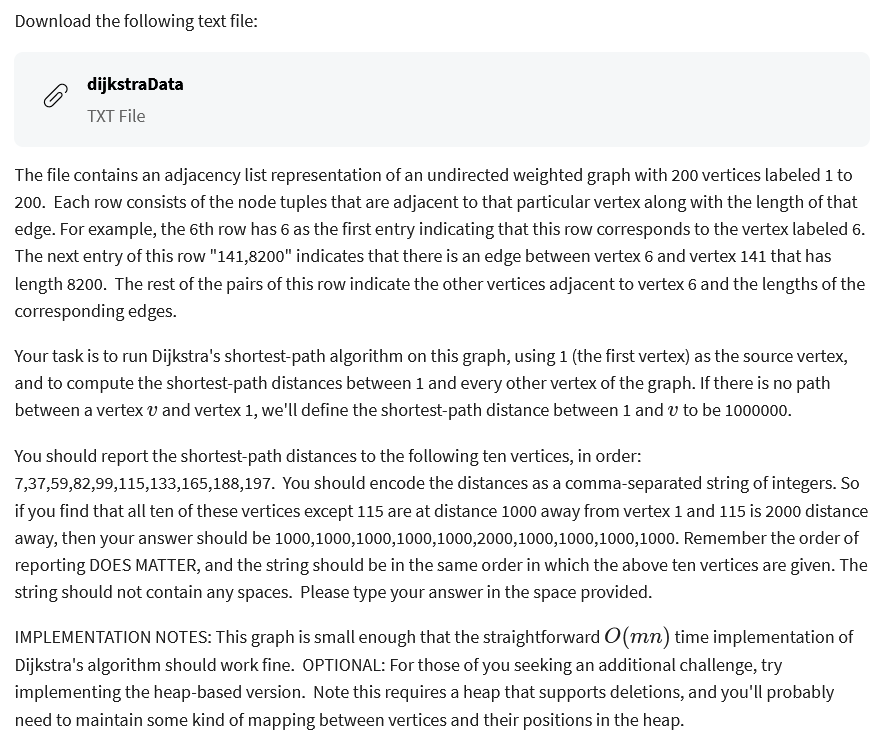

In [2]:
from PIL import Image
from IPython.display import display

def open_image(image_path):
    try:
        image = Image.open(image_path)
        return image
    except IOError:
        print(f"Unable to open image at '{image_path}'")
        return None

image = open_image("PROGRAM EXAM 01.png")
if image:
    display(image)


In [3]:
link = "https://github.com/FedericoTarga/Algorithms"
print('Download the dijkstraData.txt file here: ', link)    

Download the dijkstraData.txt file here:  https://github.com/FedericoTarga/Algorithms


In [4]:
with open('dijkstraData.txt') as f:
    #dijkstraData
    #a = [[int(x) for x in ln.split()] for ln in f]
    data = []
    list_data = []
    node_list = []
    u = []
    v = []
    data_u = []
    data_v = []
    dict_nested = {}
    list_nested = []
    for ln in f:
        #print ln
        #print type(ln)
        #print len(ln)
        if len(ln) >1:
            data = ln.split()
            #print data
            list_data.append(data)           
            #print list_data

    for i in range(len(list_data)):
        node_list.append(i+1)
        del list_data[i][0]
        
        for j in range(len(list_data[i])):
            u,v = list_data[i][j].split(',')            
            #print u,v
            #print type(u)
            data_u.append(int(u))
            data_v.append(int(v))
        #print data_u,data_v
        list_nested.append(dict(zip(data_u,data_v)))
        #print list_nested
        data_u,data_v = [],[]
    #print node_list
    #print list_nested    
    dict_nested = dict(zip(node_list,list_nested))
    #print dict_nested
    
f.close()

def dijkstra():
    scores = []
    #print node_list
    V = node_list
    #print V
    X = [1]
    #print type(X)
    A = {}
    A[1] = 0
    #print A
    data_v = []
    data_w = []
    
    while X != V:
        for v in X:
            for w in dict_nested[v].keys():
                #print w
                if w not in A:
                    data_v.append(v)
                    data_w.append(w)
                    scores.append(A[v] + dict_nested[v][w])
                    
        #print "scores: "+str(scores)
        #print "data_w: "+str(data_w)
        find_w = 0
        find_w = data_w[scores.index(min(scores))]
        #print "w: "+ str(find_w)
        X.append(find_w)
        #print "X: "+str(X)
        A[find_w] = min(scores)
        #print "A[w],w: " +str(A[find_w])+" "+str(find_w)
        X.sort()
        scores = []
        data_v = []
        data_w = []                   
    #print A
    tmp = []
    for keys in [7,37,59,82,99,115,133,165,188,197]:
        #print A[keys]
        #print type(A[keys])
        tmp.append(A[keys])
    print(tmp)

dijkstra()

[2599, 2610, 2947, 2052, 2367, 2399, 2029, 2442, 2505, 3068]
